In [1]:
import matplotlib.pyplot as plt
import numpy as np


%load_ext autoreload
%autoreload 2

## Simulate and modify a dynamical system

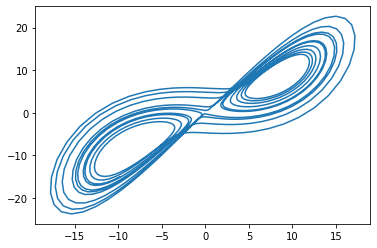

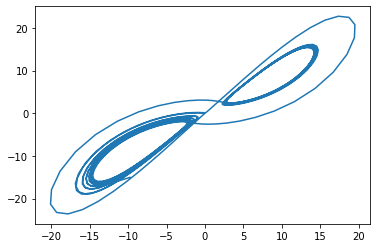

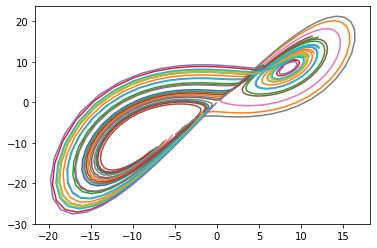

In [57]:
from dysts.flows import *

## Load and simulate an attractor
model = Lorenz()
sol = model.make_trajectory(1000, resample=True)
plt.figure()
plt.plot(sol[:, 0], sol[:, 1])

## Change a parameter value
model.sigma *= 2
sol = model.make_trajectory(1000, resample=True)
plt.figure()
plt.plot(sol[:, 0], sol[:, 1])

# ## Solve for multiple initial conditions
model = Lorenz()
model.ic = model.ic[None, :] * np.random.random(20)[:, None]
sol = model.make_trajectory(100, resample=True)
plt.figure()
plt.plot(sol[..., 0].T, sol[..., 1].T);

## Load a precomputed time series collection

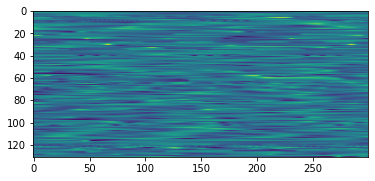

In [2]:
from dysts.datasets import *

data = load_continuous().to_array(standardize=True)
plt.imshow(data[:, :300])

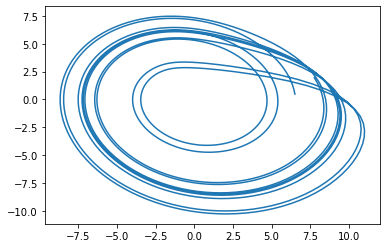

In [3]:
from dysts.flows import *

## Load and simulate an attractor
model = Rossler()
sol = model.make_trajectory(1000, resample=True)
plt.figure()
plt.plot(sol[:, 0], sol[:, 1])

## Generate dynamics from discrete-time maps

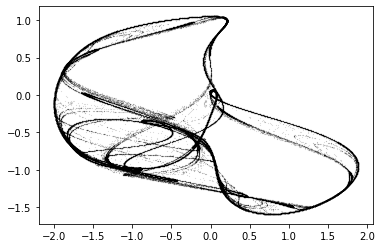

<Figure size 432x288 with 0 Axes>

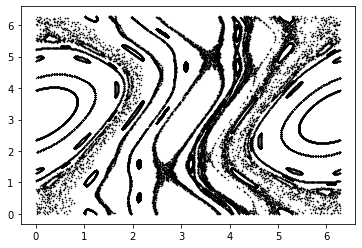

In [12]:
from dysts.maps import Chirikov, DeJong


sol =  DeJong().make_trajectory(100000)
plt.figure()
plt.plot(sol[..., 0], sol[..., 1], '.k', markersize=0.1)

model = Chirikov()
model.ic =  2 * np.pi * np.random.random((20, 2)) # uniform random initial conditions
sol = model.make_trajectory(2000)
plt.figure()
plt.figure()
plt.plot(np.mod(sol.T[0], 2*np.pi), np.mod(sol.T[1], 2*np.pi), '.k', markersize=1);